<a href="https://colab.research.google.com/github/Akash-Adak/Machine-Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Principal Component Analysis (PCA) – Theory & Intuition

## 📌 What is PCA?

Principal Component Analysis (PCA) is a **dimensionality reduction** technique used in machine learning and data analysis. It transforms a high-dimensional dataset into a lower-dimensional space while preserving as much **variance** (information) as possible.

---

## 🎯 Why Use PCA?

- ✅ Reduce computational cost
- ✅ Remove noise and redundancy
- ✅ Improve model generalization
- ✅ Visualize high-dimensional data

---

## 🧮 How PCA Works – Step-by-Step

### Step 1: Standardize the Data
Ensure all features have **zero mean and unit variance**:



\[
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
\]



This is done using `StandardScaler()` in scikit-learn.

---

### Step 2: Compute the Covariance Matrix



\[
\text{Cov}(X) = \frac{1}{n-1} X^T X
\]



This matrix captures how features vary **together**.

---

### Step 3: Compute Eigenvalues and Eigenvectors

- **Eigenvectors** → directions of maximum variance (principal components)
- **Eigenvalues** → amount of variance captured by each component



\[
\text{Cov}(X) \cdot v = \lambda \cdot v
\]



Where:
- \( v \) = eigenvector (principal component)
- \( \lambda \) = eigenvalue (variance explained)

---

### Step 4: Sort and Select Top Components

- Sort eigenvectors by descending eigenvalues
- Choose top \( k \) components (or enough to retain desired variance, e.g., 95%)

---

### Step 5: Project Data onto New Axes



\[
X_{\text{PCA}} = X_{\text{scaled}} \cdot W_k
\]



Where \( W_k \) is the matrix of top \( k \) eigenvectors.

---

## 📊 Explained Variance Ratio

Use `pca.explained_variance_ratio_` to see how much variance each component captures.



\[
\text{Total Variance Retained} = \sum_{i=1}^{k} \text{explained\_variance\_ratio}_i
\]



---

📌 When NOT to Use PCA
When interpretability of original features is critical

*   List item
*   List item


When features are already independent and low-dimensional
When data is not linear (consider t-SNE or UMAP instead)


In [1]:
# Importing the necessary libraries
from sklearn.datasets import load_digits  # For loading the digits dataset
import pandas as pd                       # For data manipulation and analysis

# Loading the digits dataset
dataset = load_digits()  # This loads a prebuilt dataset of handwritten digits (0–9)

# Displaying the keys of the dataset dictionary
dataset.keys()  # This shows the available components like 'data', 'target', 'images', 'DESCR', etc.


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
# Checking the shape of the 'data' component in the digits dataset
dataset.data.shape  # Returns (1797, 64): 1797 samples, each with 64 features (8x8 pixel images flattened)


(1797, 64)

In [3]:
# Displaying the first sample's feature vector from the dataset
dataset.data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
# Reshaping the first sample's feature vector into an 8x8 image
dataset.data[0].reshape(8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

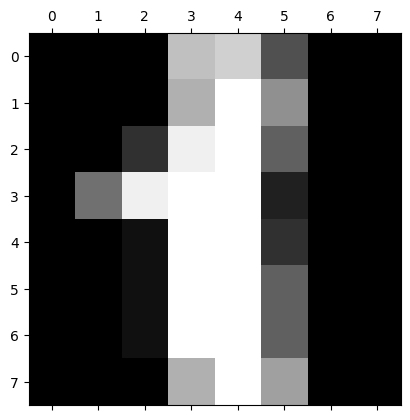

In [5]:
# Importing the plotting library
from matplotlib import pyplot as plt

# Setting the color map to grayscale for better digit visibility
plt.gray()

# Displaying the second digit image (index 1) in 8x8 format
plt.matshow(dataset.data[1].reshape(8, 8))

# Showing the plot
plt.show()


In [6]:
# Displaying the actual label (digit) of the second image in the dataset
dataset.target[1]


np.int64(1)

In [7]:
# Importing NumPy for numerical operations
import numpy as np

# Displaying all unique digit labels present in the dataset
np.unique(dataset.target)



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# Accessing the original 8x8 image arrays of the digits dataset
dataset.images


array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [9]:
# Converting the digits dataset into a DataFrame
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Displaying the first 5 rows of the DataFrame
df.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
# Generating descriptive statistics for each feature (pixel) in the dataset
df.describe()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [11]:
# Assigning the feature matrix to variable 'x'
x = df  # This contains the 64 pixel intensity features for each digit image

# Assigning the target labels to variable 'y'
y = dataset.target  # This contains the actual digit labels (0–9) for each image


In [12]:
# Importing the StandardScaler for feature normalization
from sklearn.preprocessing import StandardScaler

# Creating a scaler object
scaler = StandardScaler()

# Fitting the scaler to the feature matrix and transforming it
x_scaled = scaler.fit_transform(x)

# Displaying the scaled feature matrix
x_scaled


array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [14]:
# Importing the train_test_split function for splitting the dataset
from sklearn.model_selection import train_test_split

# Splitting the scaled feature matrix and target labels into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled,       # Scaled features
    y,              # Target labels
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=42
    )# Ensures reproduc

In [15]:
# Importing the LogisticRegression model
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model instance
model = LogisticRegression()

# Training the model using the training data
model.fit(x_train, y_train)

# Evaluating the model's accuracy on the test data
model.score(x_test, y_test)


0.9722222222222222

In [ ]:
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [16]:
# Importing PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Creating a PCA object to retain 95% of the variance
pca = PCA(0.95)

# Fitting PCA to the original feature matrix and transforming it
x_pca = pca.fit_transform(x)

# Displaying the shape of the reduced feature matrix
x_pca.shape


(1797, 29)

In [17]:
# Displaying the number of principal components selected to retain 95% variance
pca.n_components_


np.int64(29)

In [18]:
# Displaying the explained variance ratio for each principal component
pca.explained_variance_ratio_


array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [19]:
# Displaying the first 5 PCA-transformed samples
x_pca[:5]


array([[ -1.25946645, -21.27488348,   9.46305462, -13.01418869,
          7.12882278,   7.44065876,  -3.25283716,  -2.55347036,
          0.58184214,  -3.62569695,  -2.58595688,   1.55160708,
         -0.85449671,  -3.33874935,  -5.90658968,  -2.74359339,
         -0.41983691,  -0.89814969,   0.70261087,   3.46211868,
          2.68084958,   1.00944951,   2.00970276,   1.29531479,
          1.17887873,   2.30058185,   3.67072108,   0.9436689 ,
          1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604,  14.89366444,
         -5.89624878,   6.48562213,  -2.12622768,   4.61593641,
         -3.58745013,   1.07470456,   5.38571495,  -2.12951093,
          2.55532447,  -6.51699585,   2.29176445,   2.13402725,
          5.83935668,   4.47844612,  -1.95570261,   5.25570801,
         -1.20577667,  -4.83890162,   0.86025072,  -2.97443937,
          5.28881695,   0.11921327,   2.18261819,   0.51022719,
         -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808,  12.2883

In [20]:
# Splitting the PCA-reduced feature matrix and target labels into training and testing sets
from sklearn.model_selection import train_test_split

x_train_pca, x_test_pca, y_train, y_test = train_test_split(
    x_pca,          # PCA-transformed features
    y,              # Target labels
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=42 # Ensures reproducibility of the split
)


In [21]:
# Importing the LogisticRegression model
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model instance with increased max_iter to ensure convergence
model = LogisticRegression(max_iter=1000)

# Training the model using the PCA-transformed training data
model.fit(x_train_pca, y_train)

# Evaluating the model's accuracy on the PCA-transformed test data
model.score(x_test_pca, y_test)


0.9611111111111111

In [22]:
# Step 1: Importing PCA from scikit-learn
from sklearn.decomposition import PCA

# Step 2: Creating a PCA object to reduce the dataset to 6 principal components
pca = PCA(n_components=6)

# Step 3: Fitting PCA to the original feature matrix and transforming it
x_pca = pca.fit_transform(x)

# Step 4: Displaying the shape of the PCA-transformed feature matrix
x_pca.shape  # Output will be (1797, 6) → 1797 samples, each with 6 features


(1797, 6)

In [23]:
# Displaying the number of principal components used
# Since we manually set n_components=6, this will return 6
pca.n_components_


6

In [24]:
# Displaying the explained variance ratio for each principal component
# This shows how much variance each of the 6 components captures individually
pca.explained_variance_ratio_


array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 ])

In [25]:
# Step 1: Importing the train_test_split function
from sklearn.model_selection import train_test_split

# Step 2: Splitting the PCA-transformed feature matrix and target labels into training and testing sets
x_train_pca, x_test_pca, y_train, y_test = train_test_split(
    x_pca,          # PCA-reduced features (6 components per sample)
    y,              # Target labels (digits 0–9)
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=42 # Ensures reproducibility of the split
)


In [26]:
# Step 1: Importing the LogisticRegression model
from sklearn.linear_model import LogisticRegression

# Step 2: Creating a logistic regression model instance
# Setting max_iter=1000 to ensure convergence during training
model = LogisticRegression(max_iter=1000)

# Step 3: Training the model using the PCA-transformed training data
model.fit(x_train_pca, y_train)

# Step 4: Evaluating the model's accuracy on the PCA-transformed test data
model.score(x_test_pca, y_test)  # Returns the accuracy score (e.g., 0.92 means 92% accuracy)


0.875

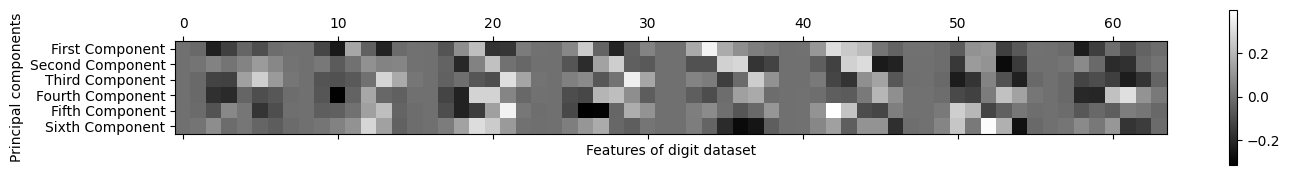

In [27]:
# Step 1: Visualizing the principal components as a heatmap
plt.matshow(pca.components_)  # Each row is a principal component, each column is a feature (pixel)

# Step 2: Labeling the y-axis with component names
plt.yticks(
    range(6),  # Since we used 6 components
    ["First Component", "Second Component", "Third Component",
     "Fourth Component", "Fifth Component", "Sixth Component"]
)

# Step 3: Adding a color bar to indicate intensity values
plt.colorbar()

# Step 4: Labeling the x-axis and y-axis
plt.xlabel("Features of digit dataset")  # Each feature corresponds to a pixel in the 8x8 image
plt.ylabel("Principal components")       # Each component is a weighted combination of features

# Step 5: Saving the figure to a file with tight bounding box
plt.savefig('fig.png', bbox_inches='tight')

# Step 6: Displaying the plot
plt.show()
